# Сравнение моделей

**Борисочкин М. И. ИУ5-21М**

In [137]:
from transformers import pipeline
from evaluate.visualization import radar_plot

import pandas as pd
import spacy
import stanza
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

## Сравнение качества моделей

In [95]:
test_results = pd.read_csv("eval_results.csv")

In [96]:
test_results

,model,precision,recall,f1,total_time_in_seconds,samples_per_second
0,distilBERT,0.893203,0.912136,0.902570,19.1895,601.372
1,ruBERT,0.878942,0.884734,0.881828,26.2233,440.067
2,XLM-RoBERTa,0.886792,0.903350,0.894995,32.5625,354.395


C:\Users\Михаил\AppData\Local\Temp\ipykernel_24672\3509957139.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


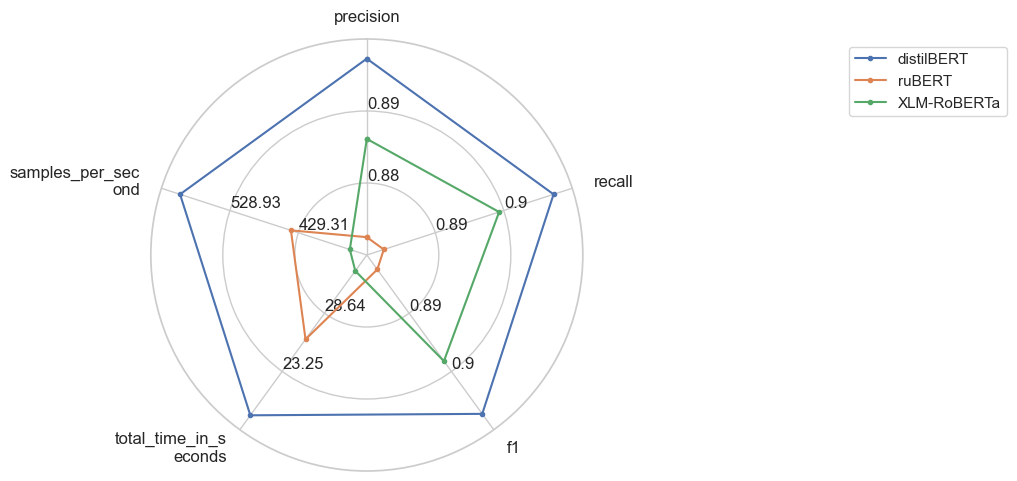

In [99]:
plot = radar_plot(
    data=test_results.drop(columns=["model"]),
    model_names=test_results["model"],
    invert_range=["total_time_in_seconds"],
)
plot.show()

## Сравнение результатов предсказаний

### DistilBERT

In [100]:
distilNER = pipeline(
    task="token-classification", model="distilBERT/distilBERT_best_model"
)

In [110]:
%time distilNER("Путин президент России. Он работает в Кремле".split(sep="."))

CPU times: total: 31.2 ms
Wall time: 22.3 ms


[[{'entity': 'B-PER',
   'score': 0.91723853,
   'index': 1,
   'word': 'П',
   'start': 0,
   'end': 1},
  {'entity': 'I-PER',
   'score': 0.5098536,
   'index': 2,
   'word': '##ути',
   'start': 1,
   'end': 4},
  {'entity': 'B-LOC',
   'score': 0.9732949,
   'index': 5,
   'word': 'России',
   'start': 16,
   'end': 22}],
 [{'entity': 'B-LOC',
   'score': 0.9989243,
   'index': 4,
   'word': 'К',
   'start': 15,
   'end': 16},
  {'entity': 'B-LOC',
   'score': 0.73638284,
   'index': 5,
   'word': '##рем',
   'start': 16,
   'end': 19},
  {'entity': 'I-LOC',
   'score': 0.80140376,
   'index': 6,
   'word': '##ле',
   'start': 19,
   'end': 21}]]

### RuBERT

In [108]:
ruBERTNER = pipeline(task="token-classification", model="ruBERT/ruBERT_best_model")

In [111]:
%time ruBERTNER("Путин президент России. Он работает в Кремле".split(sep="."))

CPU times: total: 46.9 ms
Wall time: 41.3 ms


[[{'entity': 'B-PER',
   'score': 0.9872185,
   'index': 1,
   'word': 'путин',
   'start': 0,
   'end': 5},
  {'entity': 'B-LOC',
   'score': 0.8746196,
   'index': 3,
   'word': 'россии',
   'start': 16,
   'end': 22}],
 [{'entity': 'B-LOC',
   'score': 0.8413622,
   'index': 4,
   'word': 'кремле',
   'start': 15,
   'end': 21}]]

### XLM-RoBERTa

In [112]:
RoBERTaNER = pipeline(
    task="token-classification", model="XLM-RoBERTa/XLM-RoBERTa_best_model"
)

In [113]:
%time RoBERTaNER("Путин президент России. Он работает в Кремле".split(sep="."))

CPU times: total: 31.2 ms
Wall time: 42.4 ms


[[{'entity': 'B-LOC',
   'score': 0.99616575,
   'index': 3,
   'word': '▁России',
   'start': 16,
   'end': 22}],
 [{'entity': 'B-LOC',
   'score': 0.75023603,
   'index': 4,
   'word': '▁Крем',
   'start': 15,
   'end': 19},
  {'entity': 'I-ORG',
   'score': 0.56308204,
   'index': 5,
   'word': 'ле',
   'start': 19,
   'end': 21}]]

### [Stanza](https://stanfordnlp.github.io/stanza/)

In [151]:
stanza.download("ru")
nlp = stanza.Pipeline("ru")
doc = nlp("Путин президент России. Он работает в Кремле")

2024-06-07 00:37:53 INFO: Downloaded file to C:\Users\Михаил\stanza_resources\resources.json
2024-06-07 00:37:53 INFO: Downloading default packages for language: ru (Russian) ...
2024-06-07 00:37:53 INFO: File exists: C:\Users\Михаил\stanza_resources\ru\default.zip
2024-06-07 00:37:57 INFO: Finished downloading models and saved to C:\Users\Михаил\stanza_resources
2024-06-07 00:37:57 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-06-07 00:37:57 INFO: Downloaded file to C:\Users\Михаил\stanza_resources\resources.json
2024-06-07 00:37:58 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-06-07 00:37:58 INFO: Using device: cuda
2024-06-07 00:37:58 INFO: Loading: tokenize
2024-06-07 00:37:58 INFO: Loading: pos
2024-06-07 00:37:59 INFO: Loading: lemma
2024-06-07 00:37:59 INFO: Loading: depparse
2024-06-07 00:37:59 INFO: Loading: ner
2024-06-07 00:38:00 INFO: Done loading processors!


In [153]:
print(
    *[
        f"entity: {ent.text}\ttype: {ent.type}"
        for sent in doc.sentences
        for ent in sent.ents
    ],
    sep="\n",
)

entity: Путин президент России	type: MISC
entity: Кремле	type: LOC


### [spaCy](https://spacy.io/)

In [135]:
nlp = spacy.load("ru_core_news_sm")
doc = nlp("Путин президент России. Он работает в Кремле")

In [136]:
for token in doc:
    print(token.text, token.ent_type_)

Путин PER
президент 
России LOC
. 
Он 
работает 
в 
Кремле LOC


## Вывод

Все обученные LLM показали отличное качество распознавания и не уступают библиотечным решениям. Лучше всего себя показала модель DistilBERT и по качеству, и по времени вывода. 